# 凸优化课程实验

61518407 李浩瑞

完成于2019.12.24 平安夜

# 求解注水问题

\begin{equation}
\text { min } \quad-\sum_{i=1}^{n} \log \left(\alpha_{i}+x_{i}\right)
\end{equation}

\begin{equation}
\text { s.t. } \quad x \succeq 0, \quad 1^{T} x=1
\end{equation}

Lagrange函数：

\begin{equation}
L(x, \lambda, v)=-\sum_{i=1}^{n} \log \left(\alpha_{i}+x_{i}\right)-\lambda^{T} x+v\left(1^{T} x-1\right)
\end{equation}

g（）函数

\begin{equation}
g(\lambda,v)=inf _{x \in D} L(x, \lambda, v)
\end{equation}

下面将通过KTT条件求解该问题

# 求解KTT条件

①原始可行性

\begin{equation}
 \quad x^{*} \succeq 0, \quad 1^{T} x^{*}=1
\end{equation}

②对偶可行性

\begin{equation}
\lambda^{*} \succeq 0
\end{equation}

③互补松弛性

\begin{equation}
\lambda_{i} * x_{i} *=0, i=1, \ldots, n
\end{equation}

④稳定性条件

\begin{equation}
\lambda_{i} * x_{i}^{*}=0, i=1, \ldots, n
\end{equation}

用②式带入⑤式中，得到

\begin{equation}
-\frac{1}{\alpha_{i}+x_{i} *}+v^{*} \geq 0, i=1, \ldots, n
\end{equation}

即可解得

\begin{equation}
x^{*}=\left\{\begin{array}{ll}{\frac{1}{v^{*}}-\alpha_{i}} & {v^{*}<\frac{1}{\alpha_{i}}} \\ {0} & {v^{*} \geq \frac{1}{\alpha_{i}}}\end{array}\right.
\end{equation}

即：对于已知的任意α，总可以求解出v使得x达到最优解

由③式代入有：

\begin{equation}
\sum_{i=0}^{n} \max \left\{\frac{1}{v^{*}}-\alpha_{i}, 0\right\}=1
\end{equation}

左式为单调函数（在左半平面上恒为0，在右半平面上单调递增），因此必有解。

下面使用编程，通过二分法求解。

随机生成alpha为 6 维列向量
1.1861660564712173
0.3438117761005868
0.024950814052944303
1.3580406574519022
1.8552521648748432
0.13645209029760297
二分法迭代 47 次，估计v为 1.993071180452247
每个水池中的注水量为
0
0.15792645071632516
0.47678741276396763
0
0
0.36528613651930897
目标函数的结果为 1.4055317506405465
泳池总灌水量为 0.9999999999996018


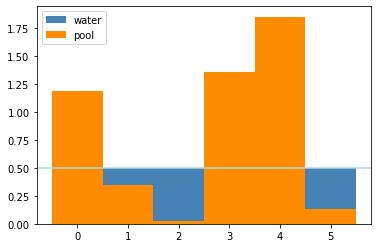

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec 23 16:13:05 2019

@author: lhr
"""

import numpy as np
import matplotlib.pyplot as plt
import random

"""
二分法求解注水问题
"""

def alpha_gen():
    """
    产生3-10行的alpha向量
    alpha取值范围为0~2
    """
    alpha=list()
    n=random.randint(3,10)
    print("随机生成alpha为",n,"维列向量")
    for i in range(0,n):
        alpha.append(random.randint(0,1)+random.random())
        print(alpha[i])
    return alpha

def calculate_target(alpha, x):
    """
    计算目标函数数值
    """
    Alpha=np.array(alpha)
    X=np.array(x)    
    return -(np.log2(Alpha+X).sum())

def calculate_sumofmax(alpha,v):
    """
    计算sigma函数值
    """
    sum=0
    for i in range(0,len(alpha)):
        sum=sum+max((1/(v)-alpha[i]),0)
    return sum

def fun(alpha,v):
    """
    需要求解函数零点的函数
    """
    return (calculate_sumofmax(alpha,v)-1)

def fill_water(alpha):
    """
    二分法进行水池灌水
    上界为100，下界为0.00001，进行二分
    """
    a = 0.000000000001
    b = 100
    c = 0.000000000001
    i=100003
    while(i>=2):
        i-=1;
        v = (a + b)/2
        if fun(alpha,v)==0:
            break
        elif ( fun(alpha,v)
        *fun(alpha,a)<0 ):
            b = v
        elif (fun(alpha,v)
        *fun(alpha,a)>0 ):
            a = v
        elif (a > b):
           print ("0.00000001,1范围内无解")
        elif(i<=3):
            print("100000次迭代无结果")
            break
        if abs(a - b)< c:
            break
    print("二分法迭代",100003-i,"次，估计v为",v)
    return v

def drawwaterpool(v,alpha):
    """
    绘制水池图像
    通过plt的单张画布特性实现重合
    """
    # 构建数据
    water_data=list()
    pool_data=list()
    x_data =list()
    for i in range(0,len(alpha)):
        water_data.append(1/v)
        x_data.append(str(i))
        pool_data.append(alpha[i])
    # 绘图
    #顺序不可颠倒
    plt.axhline(y=1/v, color='lightblue', linestyle='-')
    plt.bar(x=x_data, height=water_data, label='water', color='steelblue',width=1)
    plt.bar(x=x_data, height=pool_data, label='pool', color='darkorange', width=1)
    plt.legend()
    plt.show()

if __name__=="__main__":
    x=list()#记录每个池子的灌水量
    filledwater=0#记录总水量
    #产生alpha
    alpha=alpha_gen()
    #计算v
    v=fill_water(alpha)
    print("每个水池中的注水量为")
    for i in range(0,len(alpha)):
        x.append(max(0,(1/v)-alpha[i]))
        print(x[i])
        filledwater+=x[i]
    print("目标函数的结果为",calculate_target(alpha,x))
    print("泳池总灌水量为",filledwater)
    #绘制水池图像
    drawwaterpool(v,alpha)

观察到水池注水量x相加和为1，说明求解结果正确